In [107]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
#packages for visual
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import pickle

In [108]:
pwd

'C:\\Users\\prian'

In [109]:
dataset = pd.read_csv('C:\\Users\\prian\\Desktop\\Data1.csv')
dataset.head()

,41,0.3897756765675669,75.804607046878985,41.1,0.5161290322580645,1
0,41,0.450748,119.721586,41,0.516129,1
1,13,0.835165,351.018887,26,1.000000,0
2,13,0.714143,307.680791,26,1.000000,0
3,11,0.588235,334.996292,22,1.000000,0
4,12,0.644899,329.904769,24,1.000000,0


In [110]:
x = dataset.iloc[:,[0,1,2,3,4]].values
y = dataset.iloc[:, 5].values

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state = 0)

In [113]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [114]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [115]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [116]:
y_pred = classifier.predict(x_test)

In [126]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [127]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
xpred = np.array([x1.ravel(), x2.ravel()] + [np.repeat(0, x1.ravel().size) for _ in range(3)]).T


Text(0,0.5,'Traffic')

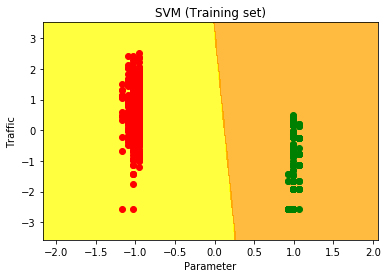

In [137]:
pred = classifier.predict(xpred).reshape(x1.shape)
plt.contourf(x1, x2, pred,
             alpha = 0.75, cmap = ListedColormap(('yellow', 'orange')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Parameter')
plt.ylabel('Traffic')